In [33]:
###Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [34]:
### read data_frame

File_Name=os.path.join(os.getcwd(),'Weather Dataset.csv')
df=pd.read_csv(File_Name)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [35]:
### handle data

df.drop(columns=['Formatted Date', 'Daily Summary'], axis=1,inplace=True) ### unrelated data 
df.drop_duplicates(inplace=True,keep='first')
df = df[(df['Humidity'] >= 0) & (df['Humidity'] <= 1)]
df = df[df['Visibility (km)'] >= 0]
df = df[(df['Temperature (C)'] >= -50) & (df['Temperature (C)'] <= 50)]
df.drop(columns='Loud Cover',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2518 entries, 0 to 2519
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   2518 non-null   object 
 1   Precip Type               2518 non-null   object 
 2   Temperature (C)           2518 non-null   float64
 3   Apparent Temperature (C)  2518 non-null   float64
 4   Humidity                  2518 non-null   float64
 5   Wind Speed (km/h)         2518 non-null   float64
 6   Wind Bearing (degrees)    2518 non-null   float64
 7   Visibility (km)           2518 non-null   float64
 8   Pressure (millibars)      2518 non-null   float64
dtypes: float64(7), object(2)
memory usage: 196.7+ KB


In [36]:
### handle categorical data
label_enc = LabelEncoder()
df['Precip Type'] = label_enc.fit_transform(df['Precip Type'])## LabelEncoder
df = pd.get_dummies(df, columns=['Summary'], drop_first=True) ## onehatencoder
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,False,False,False,False,False,False,False,True
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,False,False,False,False,False,False,False,True
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,False,False,False,False,False,True,False,False
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,False,False,False,False,False,False,False,True
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,False,False,False,False,False,True,False,False


In [37]:
### divide to Features and target(label)
X = df.drop('Temperature (C)', axis=1) 
y = df['Temperature (C)']

In [38]:
# Split  training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
#  Linear Regression model
linear = LinearRegression()
linear.fit(X_train, y_train)

# check  predictions
y_pred = linear.predict(X_test)

# metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse}, R2: {r2}")
### tha result is very good 

Linear Regression - MSE: 0.7079765331517455, R2: 0.9909215450504647



1. What type of machine learning problem is this?
This is a regression problem.

2. How do the features relate to each other and to the weather conditions?
Features such as humidity, wind speed, and pressure influence weather conditions and are interrelated. For instance, high humidity and low wind speed can correlate with higher temperatures.

3. What are the steps involved in preprocessing the dataset for machine learning?
- Drop unrelated columns.
- Handle unlogic values.
- handle categorical data.
- Split the data into training and testing sets.

4. How do we select the best model for our dataset?
By training  models and comparing their performance using metrics like Mean Squared Error (MSE) and R-squared (R2). 

5. What metrics should we use to evaluate the performance of our weather prediction model?
Common metrics using for regression models:
- Mean Squared Error (MSE)
- R-squared (R2)

6. Plot the predicted vs true values



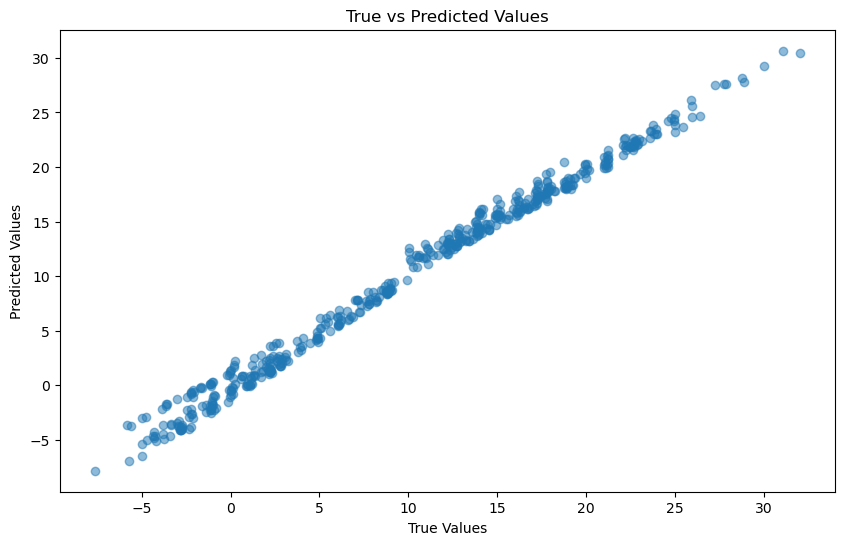

In [41]:
# Plot Predicted vs True Values
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test,y= y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()